In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Wine.csv")
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

# Plot boxplot

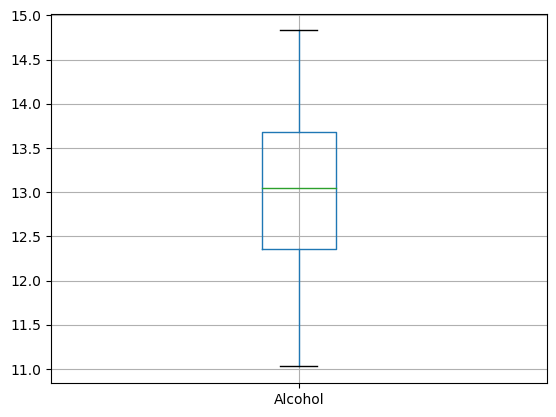

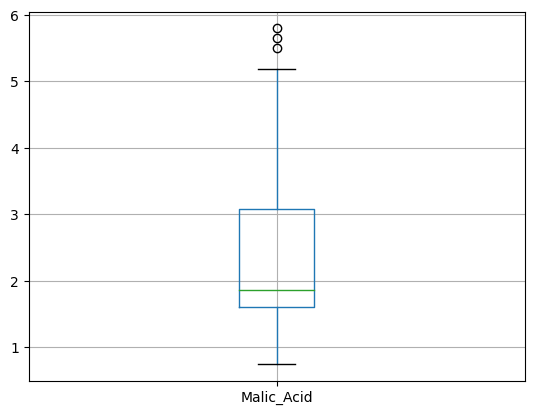

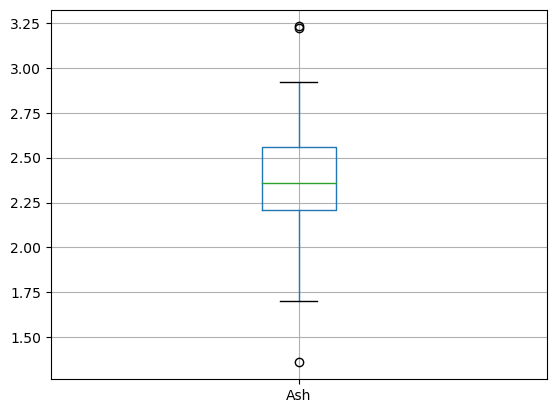

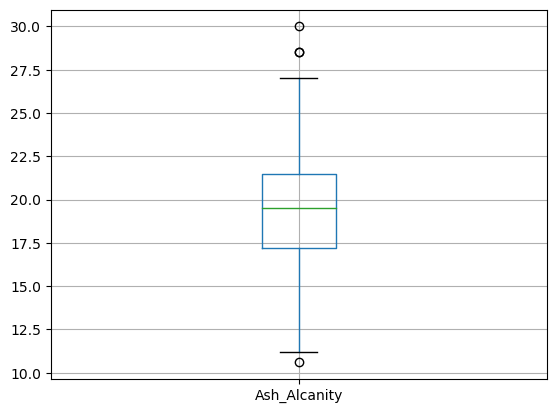

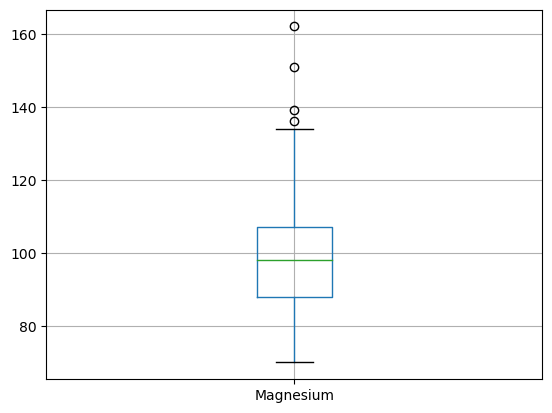

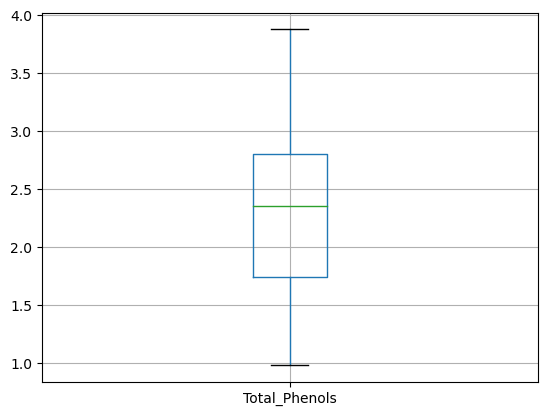

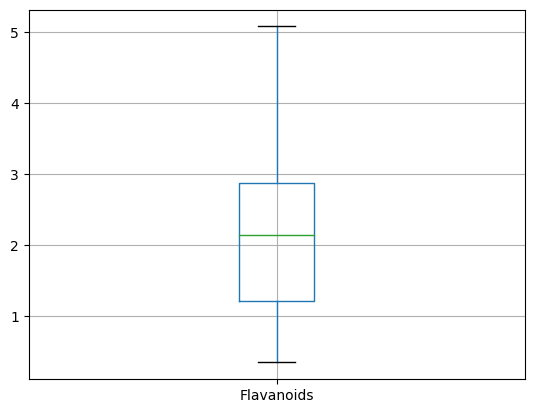

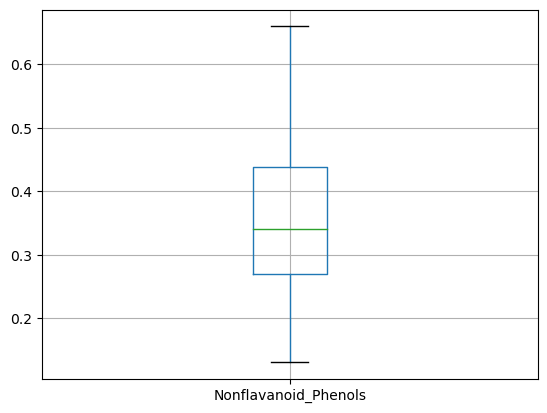

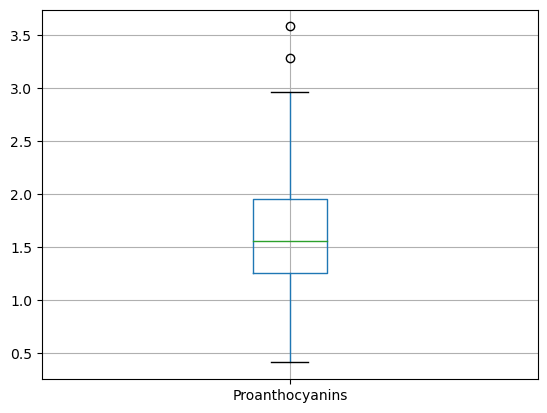

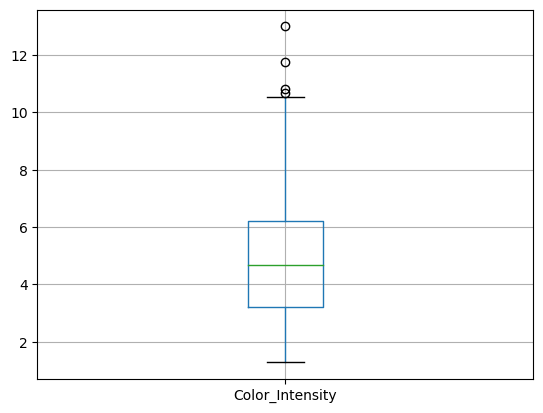

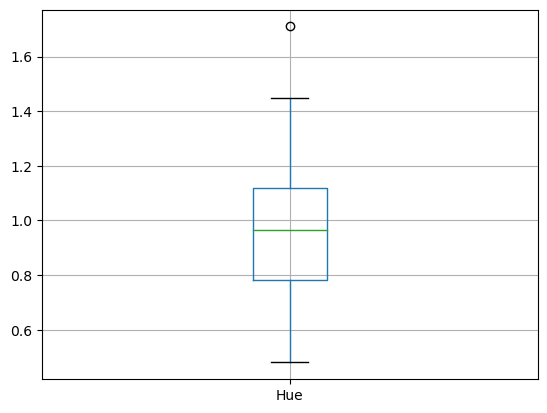

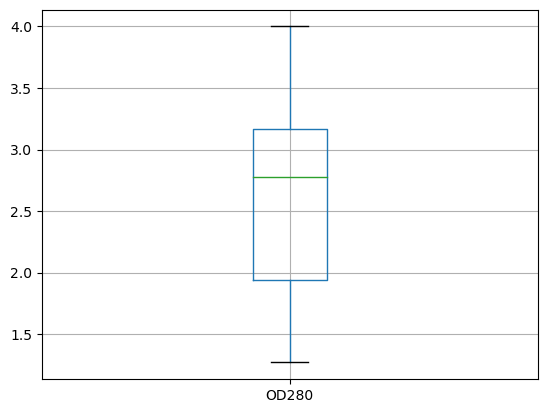

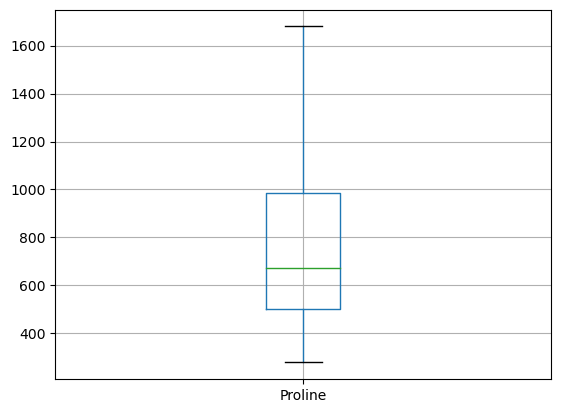

In [4]:
for i in df.columns:
    df.boxplot(column=i)
    plt.show()

# To find outliers

In [7]:
def IQR_values(df,column_name):
    q1=df[column_name].quantile(0.25)
    q2=df[column_name].quantile(0.50)
    q3=df[column_name].quantile(0.75)
    IQR=q3-q1
    lower_limit=q1-1.5*IQR
    upper_limit=q3+1.5*IQR
    return lower_limit,upper_limit
outlier={}
for column in df.columns:
    lower_limit,upper_limit=IQR_values(df,column)
    outlier[column]=[lower_limit,upper_limit]
outlier

{'Alcohol': [10.389999999999997, 15.650000000000002],
 'Malic_Acid': [-0.6174999999999997, 5.3025],
 'Ash': [1.6887499999999998, 3.0787500000000003],
 'Ash_Alcanity': [10.749999999999998, 27.950000000000003],
 'Magnesium': [59.5, 135.5],
 'Total_Phenols': [0.15625000000000022, 4.3862499999999995],
 'Flavanoids': [-1.2999999999999998, 5.38],
 'Nonflavanoid_Phenols': [0.018750000000000044, 0.68875],
 'Proanthocyanins': [0.20000000000000018, 3.0],
 'Color_Intensity': [-1.2500000000000009, 10.670000000000002],
 'Hue': [0.2762499999999998, 1.6262500000000002],
 'OD280': [0.0887500000000001, 5.01875],
 'Proline': [-226.25, 1711.75]}

In [8]:
# To find out outier index
outindx=[]
for i in df.columns:
    df_outl=(df[i]>outlier[i][1])|(df[i]<outlier[i][0])
    x=df.loc[df_outl].index
    outindx.append(x)
outindx

[Int64Index([], dtype='int64'),
 Int64Index([123, 137, 173], dtype='int64'),
 Int64Index([25, 59, 121], dtype='int64'),
 Int64Index([59, 73, 121, 127], dtype='int64'),
 Int64Index([69, 73, 78, 95], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([95, 110], dtype='int64'),
 Int64Index([151, 158, 159, 166], dtype='int64'),
 Int64Index([115], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64')]

# Replace outliers with mean

In [9]:
for i in range(len(df.columns)):
    df.loc[outindx[i],df.columns[i]]=df[df.columns[i]].mean()
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.710000,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.780000,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.360000,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.950000,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.590000,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,2.336348,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.910000,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.280000,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.590000,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


# Standard Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [13]:
x=scalar.fit_transform(df)
x

array([[ 1.51861254, -0.55611176,  0.27352504, ...,  0.39302085,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.4878705 , -0.90206483, ...,  0.43831103,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.0775571 ,  1.24642701, ...,  0.34773066,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.94931742, -0.41561385, ..., -1.64503741,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.30177839,  0.03029955, ..., -1.59974723,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.77383989,  1.53019008, ..., -1.55445704,
        -1.42894777, -0.59516041]])

In [15]:
df.update(pd.DataFrame(x,columns=df.columns))
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.556112,0.273525,-1.254465,2.319053,0.808997,1.034819,-0.659563,1.343371,0.348863,0.393021,1.847920,1.013009
1,0.246290,-0.487870,-0.902065,-2.712869,0.108124,0.568648,0.733629,-0.820719,-0.541695,-0.254968,0.438311,1.113449,0.965242
2,0.196879,0.077557,1.246427,-0.260099,0.190010,0.808997,1.215533,-0.498407,2.313900,0.368033,0.347731,0.788587,1.395148
3,1.691550,-0.322142,0.557288,-0.856719,1.172645,2.491446,1.466525,-0.981875,1.138067,1.384003,-0.422202,1.184071,2.334574
4,0.295700,0.301778,2.057179,0.535394,1.582077,0.808997,0.663351,0.226796,0.466162,-0.283722,0.393021,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,0.054500,0.354600,0.369666,-0.301308,-0.985614,-1.424900,1.274310,-0.952303,1.336080,-1.418586,-1.231206,-0.021952
174,0.493343,1.588614,0.476213,1.198305,0.271896,-0.793334,-1.284344,0.549108,-0.299063,1.144388,-1.146845,-1.485445,0.009893
175,0.332758,1.949317,-0.415614,0.203939,1.745849,-1.129824,-1.344582,0.549108,-0.411047,2.534159,-1.645037,-1.485445,0.280575
176,0.209232,0.301778,0.030300,0.203939,1.745849,-1.033684,-1.354622,1.354888,-0.205743,2.102850,-1.599747,-1.400699,0.296498


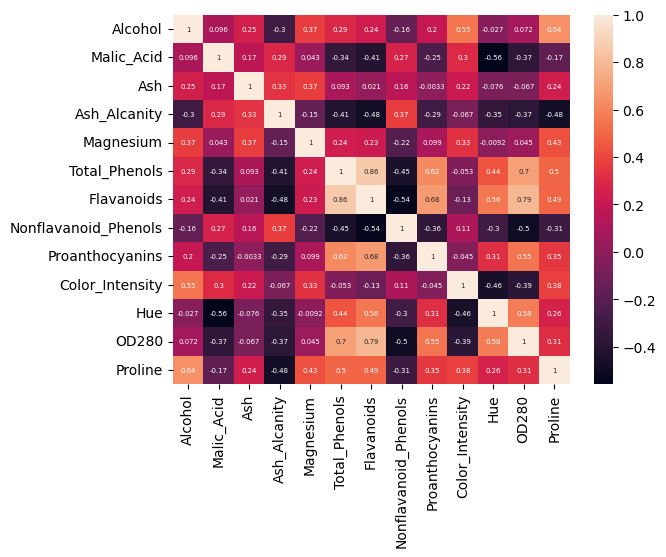

In [17]:
sns.heatmap(df.corr(),cmap="rocket",annot=True,annot_kws={'size':5})
plt.show()

# UNSUPERVISED MODELLING

# K-means Clustering

In [20]:
x=df.iloc[:,0:14].values
x

array([[ 1.51861254, -0.55611176,  0.27352504, ...,  0.39302085,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.4878705 , -0.90206483, ...,  0.43831103,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.0775571 ,  1.24642701, ...,  0.34773066,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.94931742, -0.41561385, ..., -1.64503741,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.30177839,  0.03029955, ..., -1.59974723,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.77383989,  1.53019008, ..., -1.55445704,
        -1.42894777, -0.59516041]])

In [21]:
from sklearn.cluster import KMeans

In [23]:
k=range(1,11)
inertia=[]
for i in k:
    model_kmeans=KMeans(n_clusters=i,init='k-means++')
    model_kmeans.fit(x)
    inertia.append(model_kmeans.inertia_)
inertia

C:\Users\JOS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2314.0,
 1643.8540832800072,
 1241.555529484759,
 1145.3586881376305,
 1084.7388050261939,
 1027.4723119474652,
 976.6925069775918,
 933.0442084804872,
 892.7766175045663,
 865.9091768925559]

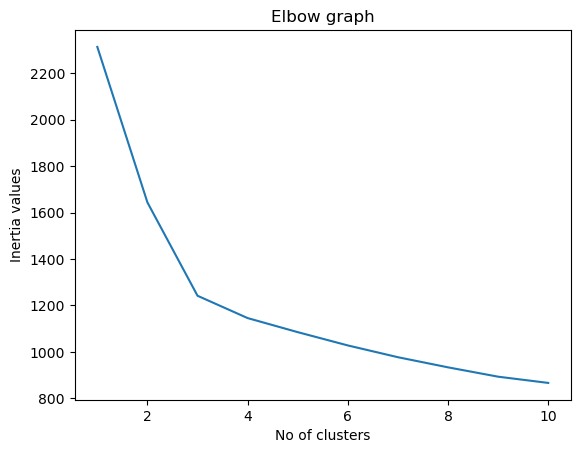

In [24]:
plt.plot(range(1,11),inertia)
plt.title("Elbow graph")
plt.xlabel('No of clusters')
plt.ylabel('Inertia values')
plt.show()

In [25]:
kmeans_final=KMeans(n_clusters=3,init="k-means++")
kmeans_pred=kmeans_final.fit_predict(df)
kmeans_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

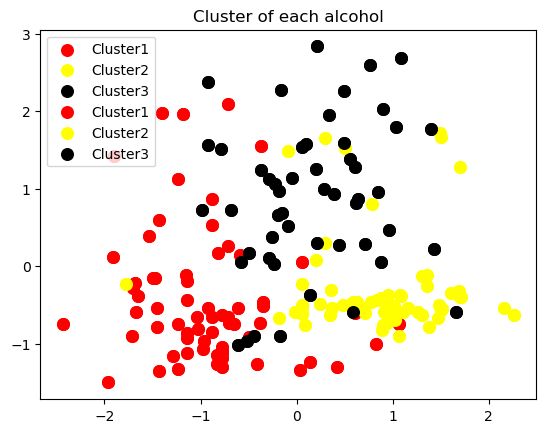

In [33]:
plt.scatter(x[kmeans_pred==0,0],x[kmeans_pred==0,1],s=70,c='red',label='Cluster1')
plt.scatter(x[kmeans_pred==1,0],x[kmeans_pred==1,1],s=70,c='yellow',label='Cluster2')
plt.scatter(x[kmeans_pred==2,0],x[kmeans_pred==2,1],s=70,c='black',label='Cluster3')
plt.title("Cluster of each alcohol")
plt.legend()
plt.show()

In [40]:
from sklearn.metrics import silhouette_score
score=silhouette_score(x,kmeans_pred,metric="euclidean")
print("Silhouette score : %.3f " % score)

Silhouette score : 0.287 


# Agglomerative Heirarchial Clustering

In [42]:
import scipy.cluster.hierarchy as sch

<Figure size 2000x1500 with 0 Axes>

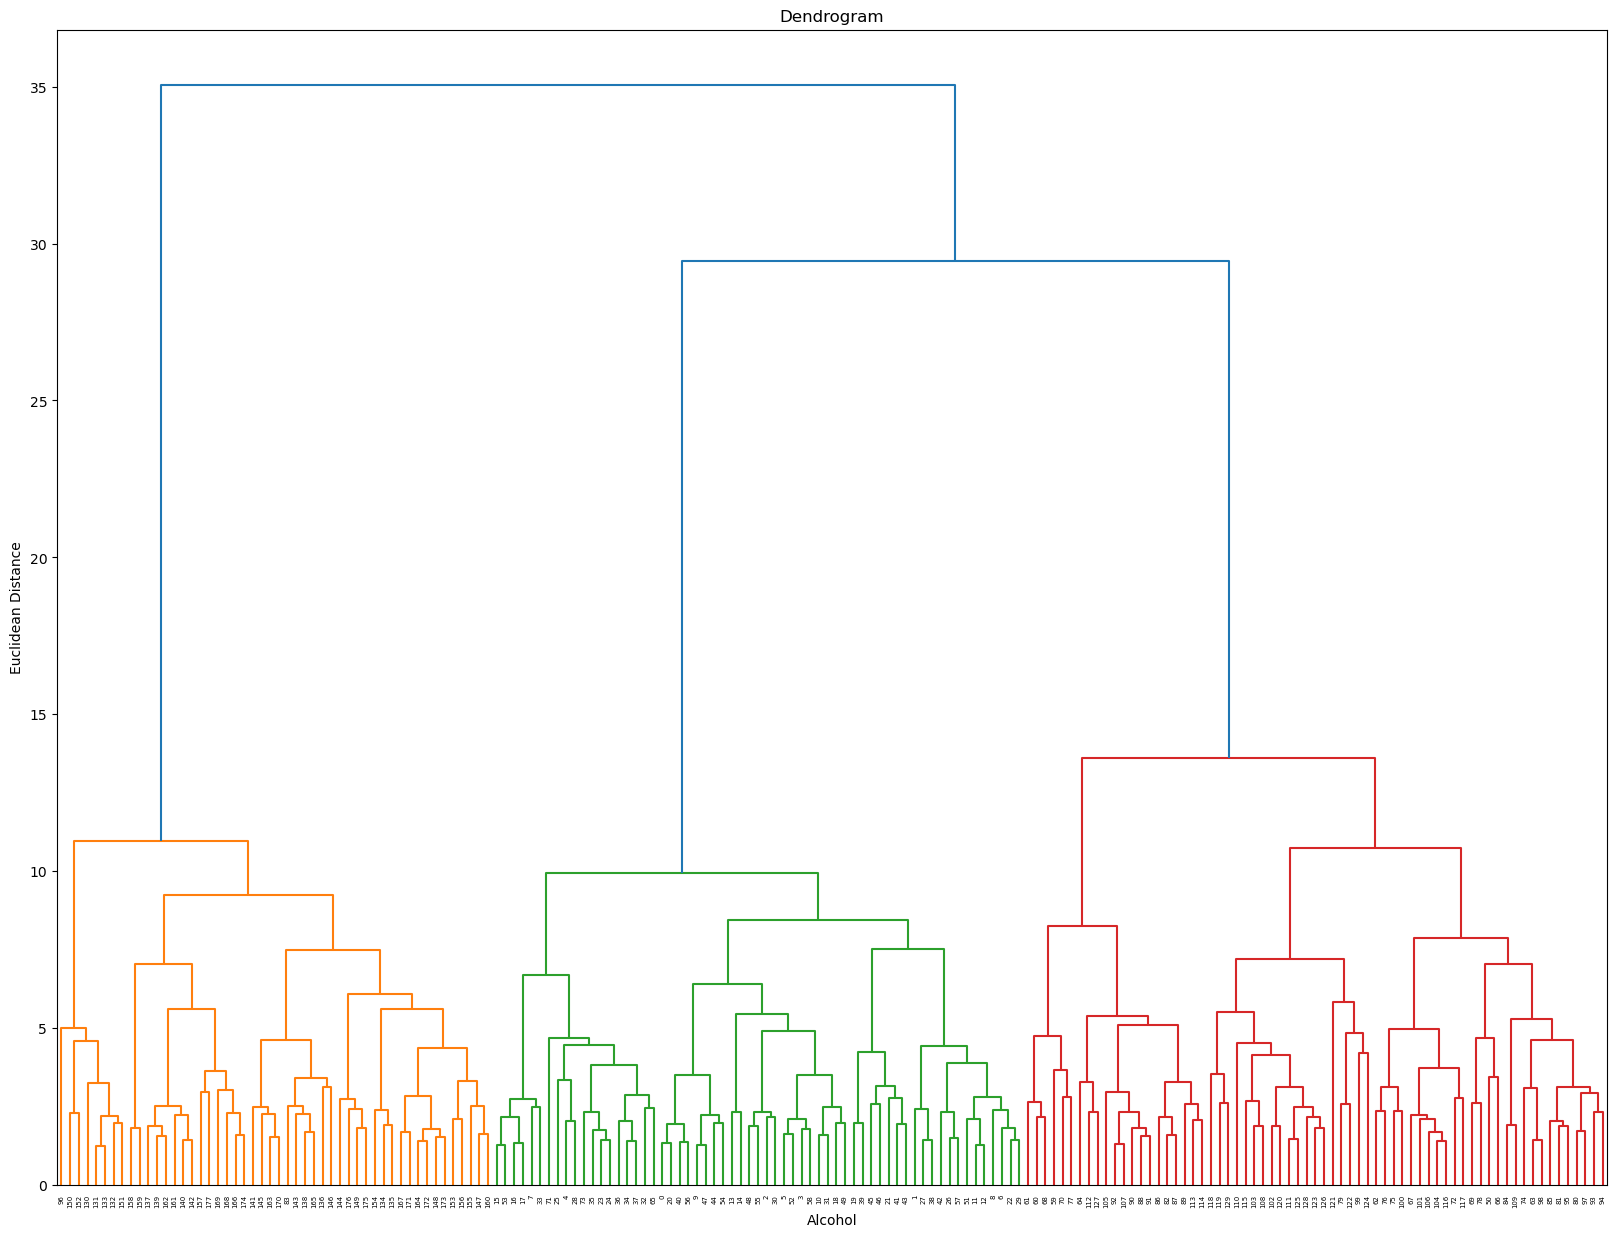

In [44]:
plt.figure(figsize=(20,15))
dendrogram=sch.dendrogram(sch.linkage(x,method="ward"))
plt.title('Dendrogram')
plt.xlabel('Alcohol')
plt.ylabel('Euclidean Distance')
plt.show()

we draw a hypothetical line to find out optimum no of clusters, here the optimum no of clusters is 3

In [45]:
from sklearn.cluster import AgglomerativeClustering
AC=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
AC_pred=AC.fit_predict(x)
AC_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

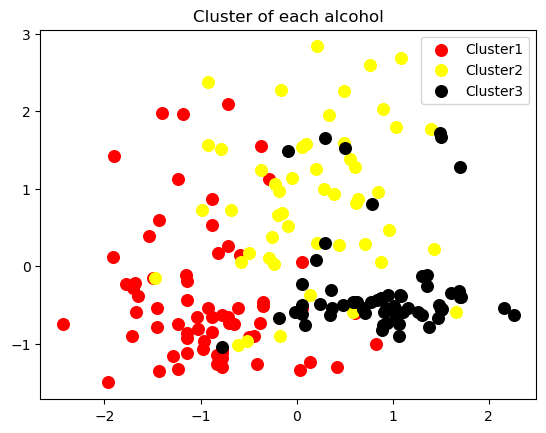

In [46]:
plt.scatter(x[AC_pred==0,0],x[AC_pred==0,1],s=70,c='red',label='Cluster1')
plt.scatter(x[AC_pred==1,0],x[AC_pred==1,1],s=70,c='yellow',label='Cluster2')
plt.scatter(x[AC_pred==2,0],x[AC_pred==2,1],s=70,c='black',label='Cluster3')
plt.title("Cluster of each alcohol")
plt.legend()
plt.show()

In [48]:
from sklearn.metrics import silhouette_score
score=silhouette_score(x,kmeans_pred,metric="euclidean")
print("Silhouette score : %.3f " % score)

Silhouette score : 0.287 
